In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d aravindanr22052001/emotiondetection-happy-or-sad

Dataset URL: https://www.kaggle.com/datasets/aravindanr22052001/emotiondetection-happy-or-sad
License(s): CC-BY-NC-SA-4.0
emotiondetection-happy-or-sad.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!pip install zipfile36

In [5]:
from zipfile import ZipFile

In [6]:
dataset = dataset = '/Users/shreyanshjain/DeepLearning/emotion_detection/emotiondetection-happy-or-sad.zip'
with ZipFile(dataset , 'r') as zip:
    zip.extractall()
    print("Extraction Successful")

Extraction Successful


In [7]:
import os

In [8]:
# data_dir = '/Users/shreyanshjain/DeepLearning/emotion_detection/data'
data_dir = 'data'
os.listdir(data)

NameError: name 'data' is not defined

In [9]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
# to avoid OMM error
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , True)

In [12]:
import cv2
import imghdr

In [13]:
image_ext = ['jpeg' , 'png' , 'jpg' , 'bmp']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        image_path = os.path.join(data_dir , image_class , image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print(f"Image not in the desired extension {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

Image not in the desired extension data/happy/o-HAPPY-facebook.jpg
Image not in the desired extension data/happy/3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
Image not in the desired extension data/happy/Happy20People.jpg
Image not in the desired extension data/sad/50740738-portrC3A4ts-der-traurige-menschen.jpg
Image not in the desired extension data/sad/44861512-smiling-man-in-a-crowd-of-sad-people.jpg
Image not in the desired extension data/sad/sad-people-chairs-group-therapy-session_23-2148752072.jpg
Image not in the desired extension data/sad/sad-people-group-therapy-session_23-2148752071.jpg
Image not in the desired extension data/sad/cry-360x240.gif


In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 2 classes.


2024-10-20 09:47:59.572402: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-20 09:47:59.572713: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-20 09:47:59.572718: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-20 09:47:59.573088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-20 09:47:59.573590: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
data_iterator = data.as_numpy_iterator()


In [17]:
batch = data_iterator.next()
print(batch[1].shape)

(32,)


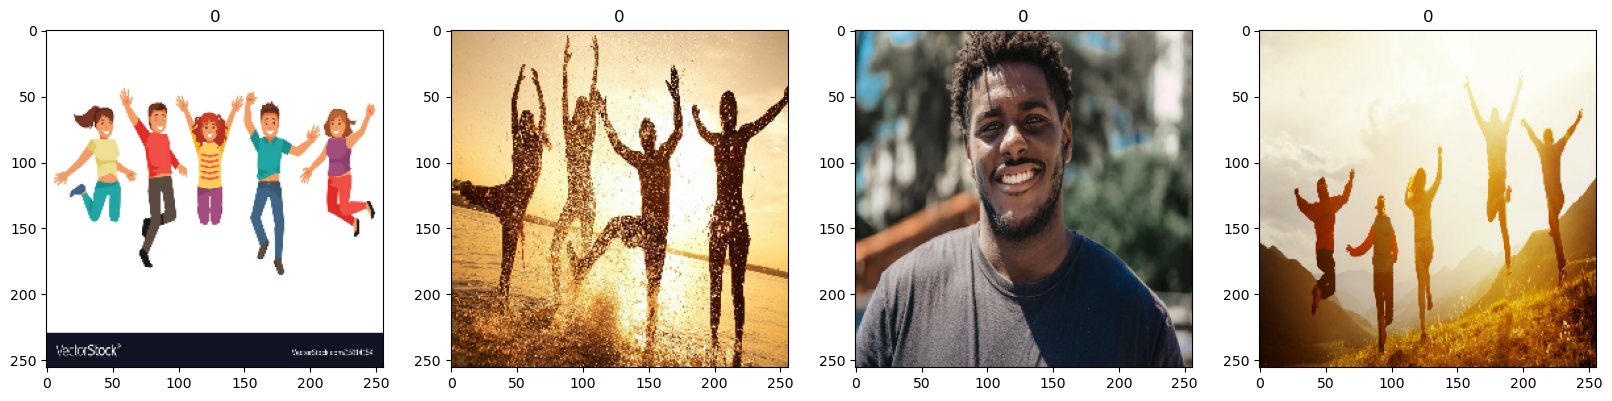

In [18]:
fig , ax = plt.subplots(ncols =4 , figsize =(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

### 0 --> Happy
###    1 --> sad

### Scale data

In [19]:
data = data.map(lambda x,y : (x/255 , y))
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

### Split Data

In [20]:
train_size = int(len(data)*0.7 )
val_size = int(len(data)*0.2 )
test_size = int(len(data)*0.1 + 1)

In [21]:
len(data)

5

In [22]:
test_size

1

In [23]:
train_size + val_size + test_size

5

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Bulding DL Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Train

In [30]:
log_dir = '/Users/shreyanshjain/DeepLearning/emotion_detection/log'
os.mkdir(log_dir)
print("Directory successfully created")

FileExistsError: [Errno 17] File exists: '/Users/shreyanshjain/DeepLearning/emotion_detection/log'

In [31]:
logdir = 'log'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train , epochs = 20 , validation_data = val , callbacks = [tensorboard_callback] )

Epoch 1/20


2024-10-20 09:48:11.725041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - accuracy: 0.5169 - loss: 1.4021 - val_accuracy: 0.5000 - val_loss: 0.8308
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.4492 - loss: 0.8110 - val_accuracy: 0.6875 - val_loss: 0.6677
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - accuracy: 0.6510 - loss: 0.6583 - val_accuracy: 0.5312 - val_loss: 0.6957
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.5951 - loss: 0.6620 - val_accuracy: 0.8125 - val_loss: 0.6170
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.7734 - loss: 0.6342 - val_accuracy: 0.7500 - val_loss: 0.5891
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.6680 - loss: 0.6525 - val_accuracy: 0.8125 - val_loss: 0.5946
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - accuracy: 0.7057 - loss: 0.5899 - val_accuracy: 0.6875 - val_loss: 0.5593
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.7070 - loss: 0.5601 - val_accuracy: 0.8750 - val_loss: 0.4847
Epo

In [34]:
hist.history

{'accuracy': [0.5416666865348816,
  0.46875,
  0.6145833134651184,
  0.6354166865348816,
  0.71875,
  0.6875,
  0.6770833134651184,
  0.75,
  0.84375,
  0.84375,
  0.8020833134651184,
  0.875,
  0.9166666865348816,
  0.8020833134651184,
  0.90625,
  0.9479166865348816,
  0.96875,
  0.9166666865348816,
  0.9375,
  0.9375],
 'loss': [1.532914161682129,
  0.7781407237052917,
  0.6569576859474182,
  0.6493616700172424,
  0.6430193781852722,
  0.6448721289634705,
  0.588961660861969,
  0.5507094264030457,
  0.5201008319854736,
  0.47865864634513855,
  0.4480837881565094,
  0.36234667897224426,
  0.34211015701293945,
  0.3923827111721039,
  0.309226393699646,
  0.3086187541484833,
  0.2162955403327942,
  0.21322031319141388,
  0.16903294622898102,
  0.17489595711231232],
 'val_accuracy': [0.5,
  0.6875,
  0.53125,
  0.8125,
  0.75,
  0.8125,
  0.6875,
  0.875,
  0.9375,
  0.84375,
  0.90625,
  0.875,
  0.96875,
  0.90625,
  0.875,
  0.9375,
  0.96875,
  0.9375,
  0.90625,
  0.96875],
 'val_l

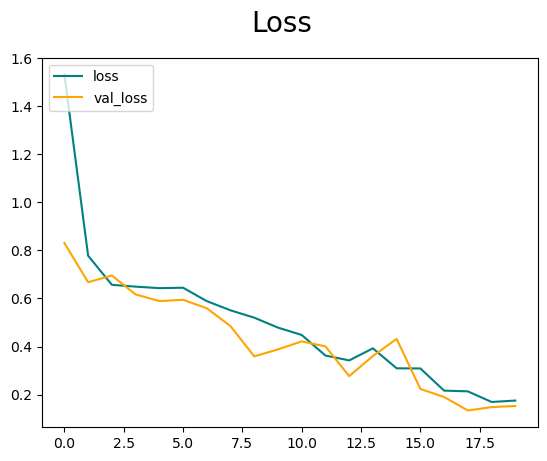

In [35]:
fig = plt.figure()
train_loss = plt.plot(hist.history['loss'] , color = 'teal' , label = 'loss')
val_loss = plt.plot(hist.history['val_loss'] , color = 'orange' , label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

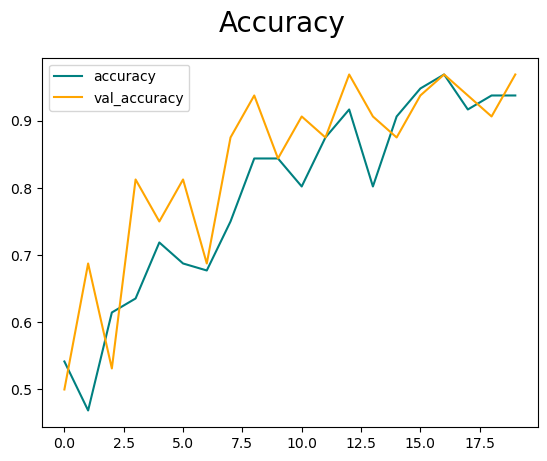

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluting model

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [39]:
for batch in test.as_numpy_iterator():
    x , y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


2024-10-20 09:48:33.489305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [40]:
print(pre.result().numpy())
print(re.result().numpy())
print(acc.result().numpy())

1.0
1.0
1.0


### Test

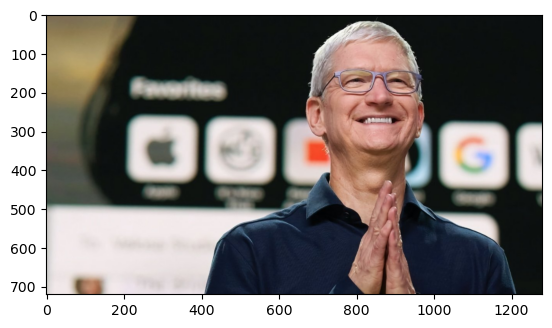

In [41]:
img = cv2.imread('test_img.jpg')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

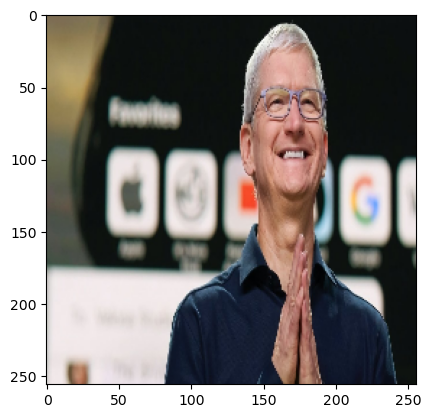

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))
# NN expect bunch of image as input so np.expand_dims add extra set of []

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [44]:
if yhat > 0.5:
    print("HAPPYYYYYYYYY")
else:
    print("SAD ")

HAPPYYYYYYYYY


### Save the Model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models' , 'emotion_dection_model.h5'))

In [48]:
new_model = load_model(os.path.join('models' , 'emotion_dection_model.h5'))

In [53]:
new_model

<Sequential name=sequential, built=True>

In [54]:
yhat_new = new_model.predict(np.expand_dims(resize/255 , 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [55]:
if yhat_new > 0.5:
    print("HAPPYYYYYYYYY")
else:
    print("SAD ")

HAPPYYYYYYYYY
